In [3]:

!apt updateapt update
!pip install mdbtools-dev
!apt-get install mdbtools
!pip install pandas pyodbc
!pip install tempfile2
import warnings
warnings.filterwarnings('ignore')

E: Invalid operation updateapt
ERROR: Could not find a version that satisfies the requirement mdbtools-dev (from versions: none)
ERROR: No matching distribution found for mdbtools-dev
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
mdbtools is already the newest version (1.0.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import sys
sys.path.append('/content/drive/MyDrive/Dev/py2/')
import numpy as np

import pandas as pd
from google.colab import files
import os
import subprocess
from io import StringIO  # StringIOを正しくインポート
import model.utility.k_analysis_util as k_a_util
from IPython.display import display

from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange

In [6]:

# 使用例
table_name = 'StatisticsVariables'  # テーブル名を指定

file_list = [f'kjdb_prediction_cache_{year}.accdb' for year in range(2000, 2025)]
years = range(2000, 2026)

k_a_util.prepare_pd_on_notebook()
print(len(file_list))

dict_statistics={}
for i in trange(len(years)):
  y = years[i]
  filepath = f'/content/drive/MyDrive/Dev/Kjvan/kjdb_prediction_cache_{y}.accdb'
  df_summary = k_a_util.read_table(filepath, table_name)
  #df_summary = df_summary[df_summary['sv_program_id'].str[-2:].astype(int).between(1, 10)]
  #df_summary = df_summary[df_summary['sv_program_id'].str[-2:].apply(lambda x: x.isdigit() and 1 <= int(x) <= 10)]
 # df_summary = df_summary[df_summary['sv_program_id'].str[-2:].apply(lambda x: x.isdigit() and 1 <= int(x) <= 10)]
  if(df_summary is not None):
   # print(y)
    columns_to_drop = ['sv_program_id','sv_race','sv_rank','sv_horse_id', 'upd', 'upd_t']
    df = df_summary.drop(columns=columns_to_drop)
    dict_statistics[y] = df.astype(float)

25


100%|██████████| 26/26 [03:10<00:00,  7.35s/it]


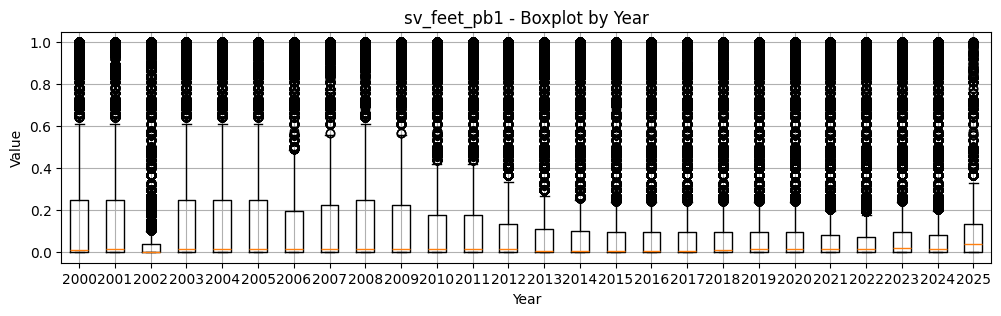

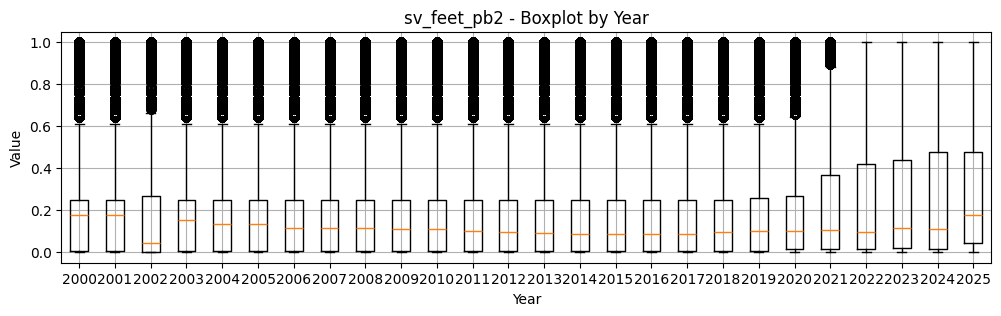

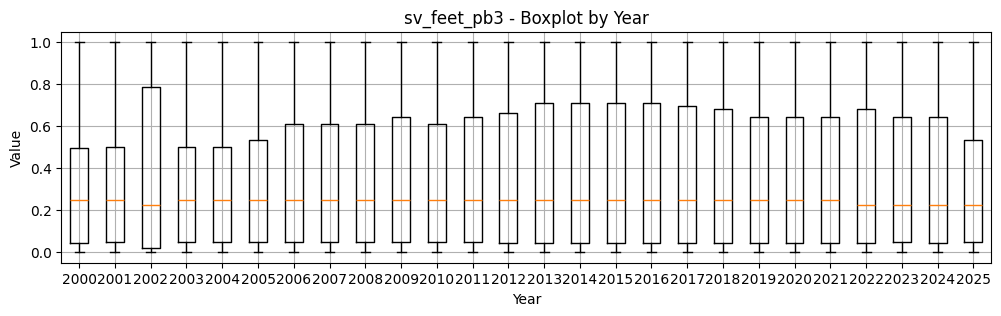

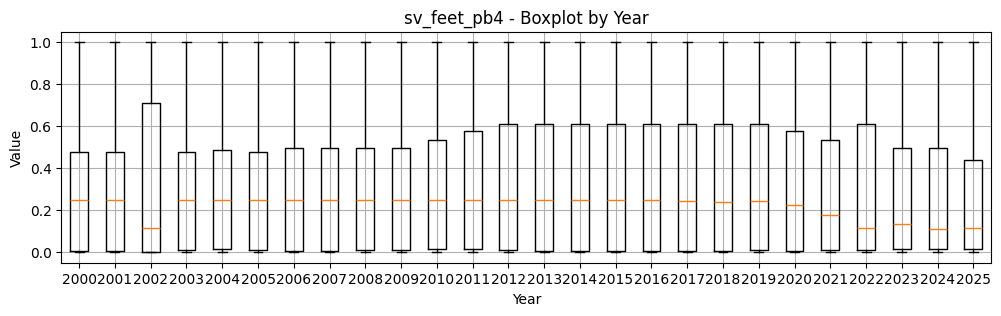

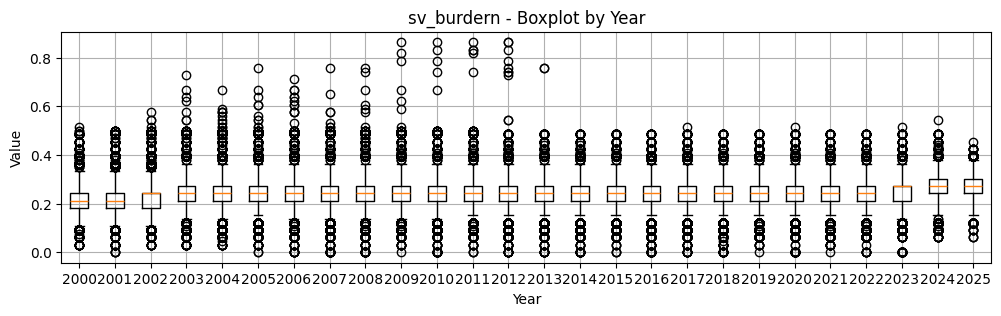

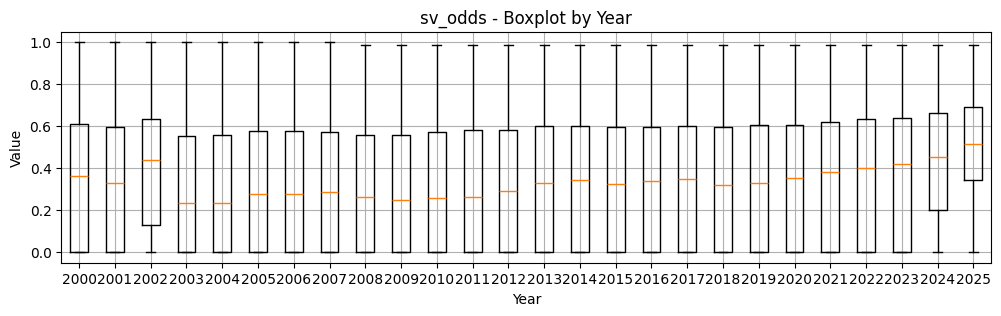

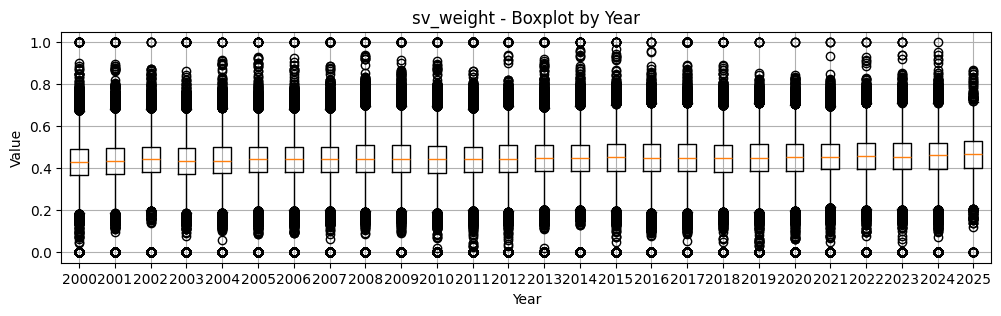

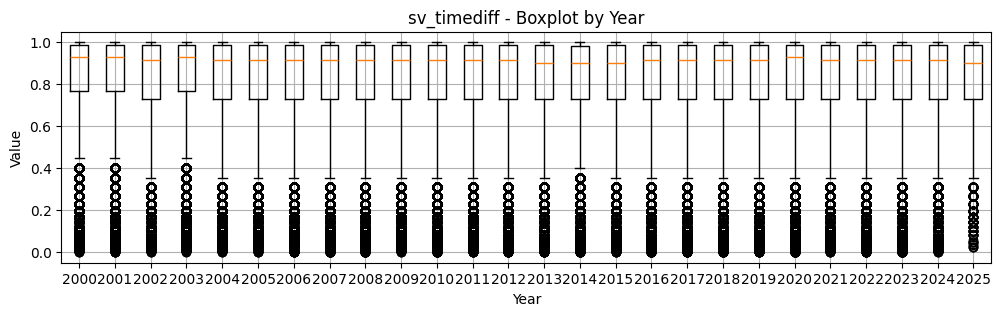

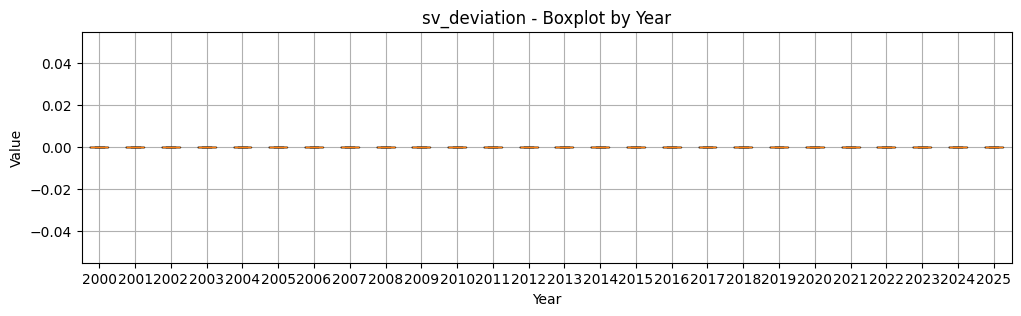

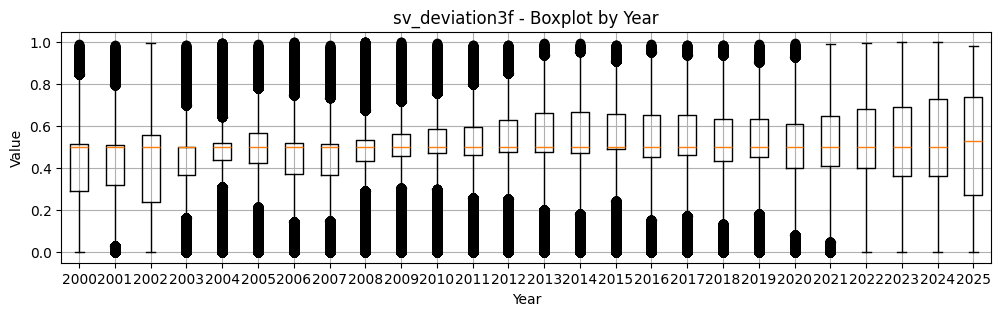

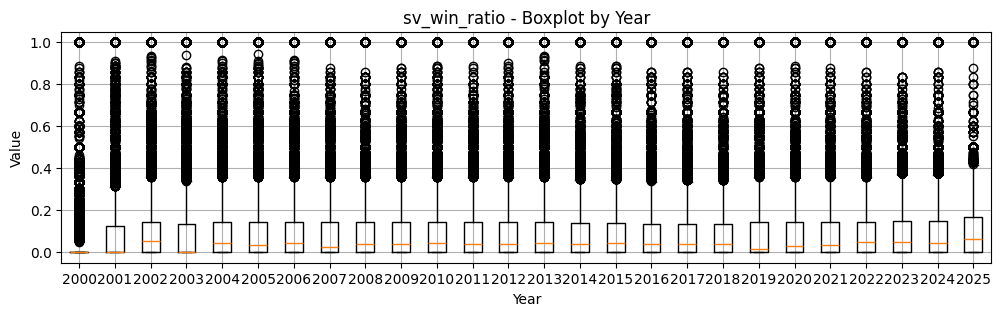

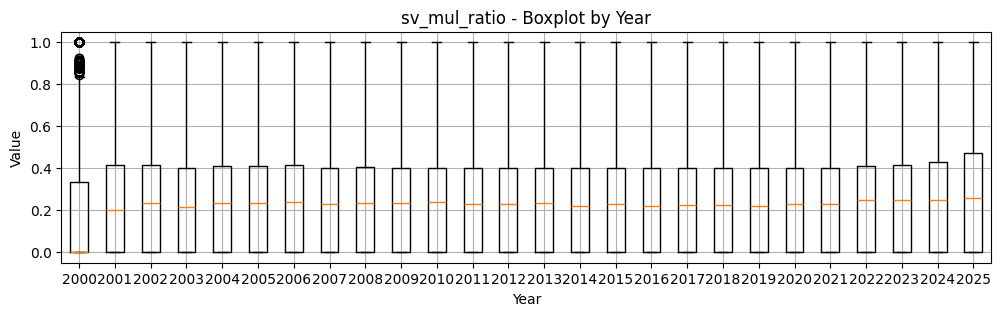

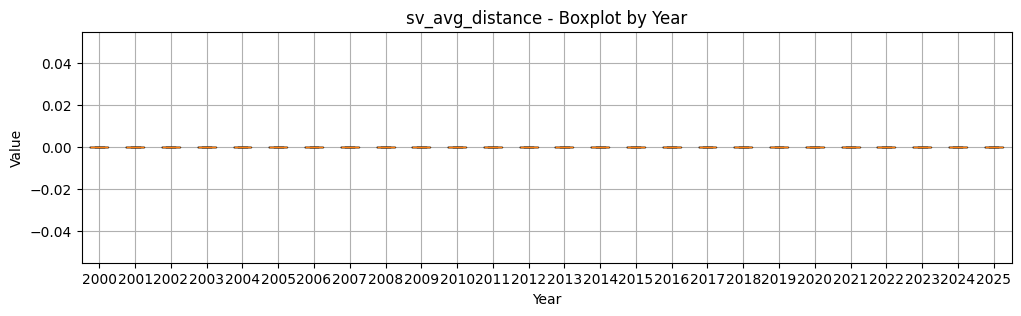

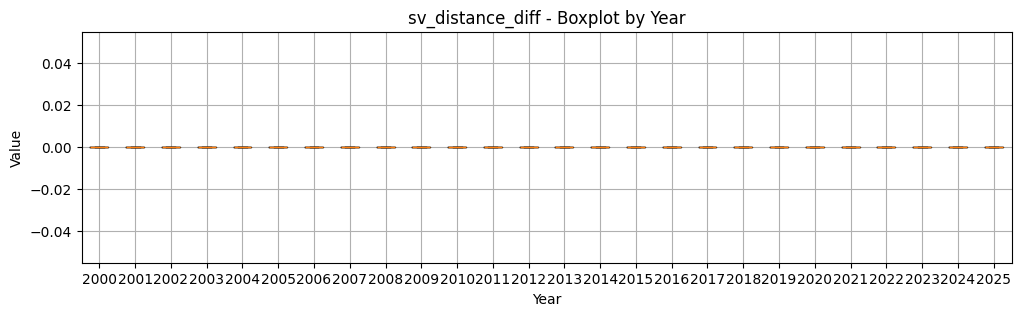

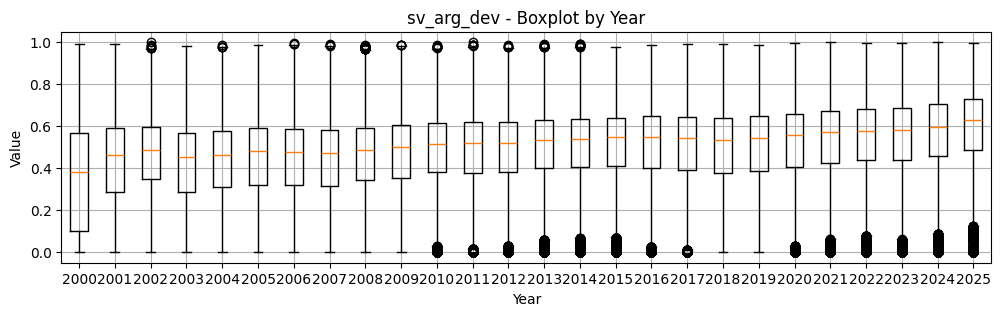

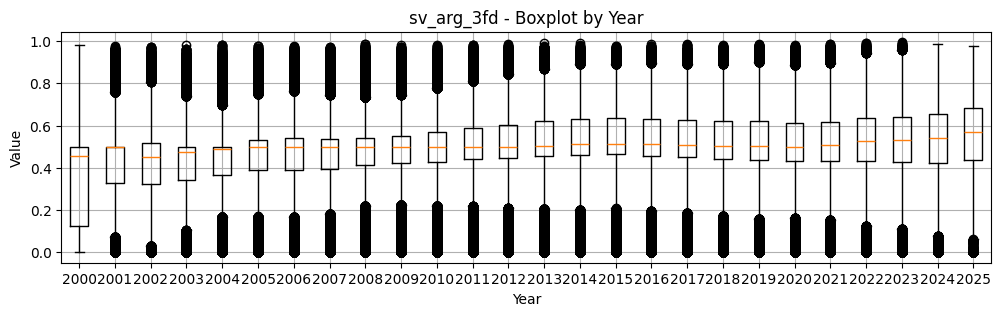

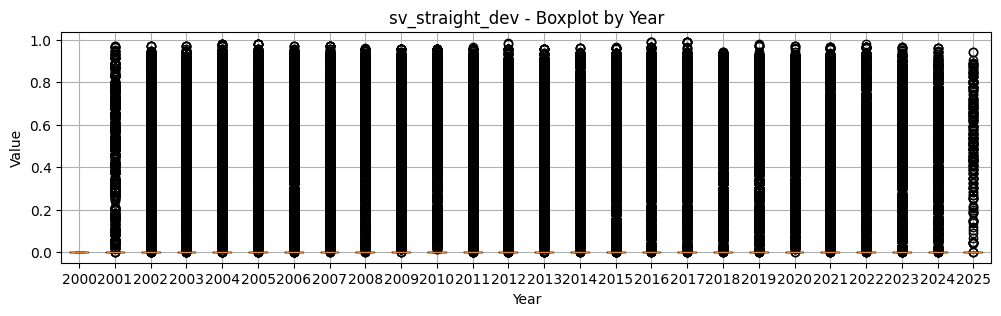

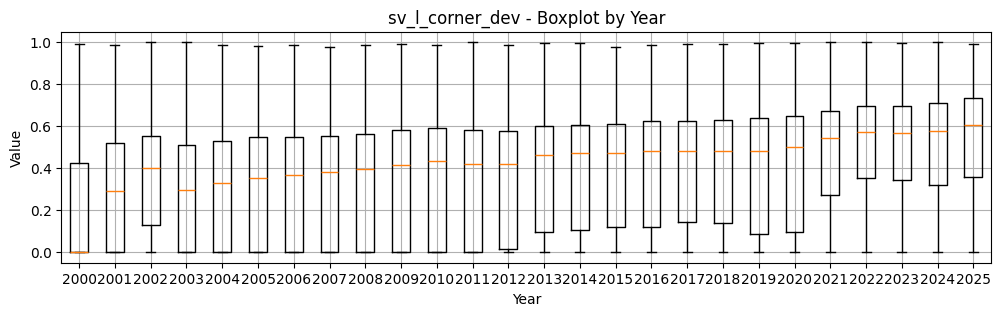

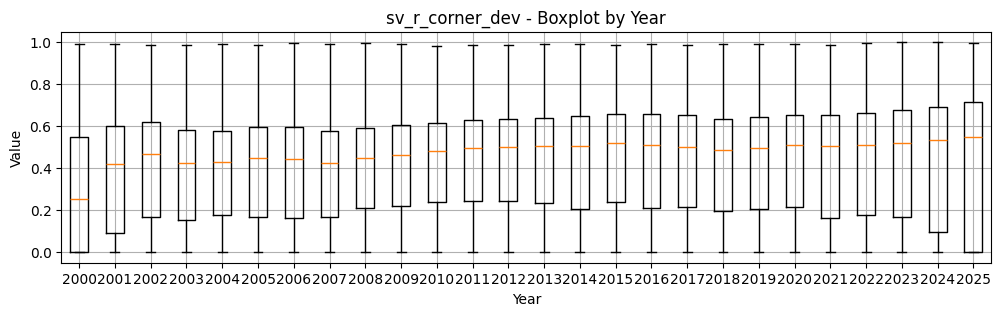

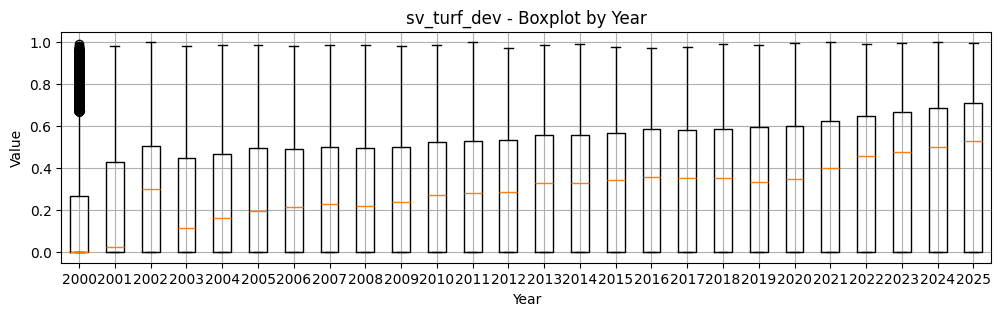

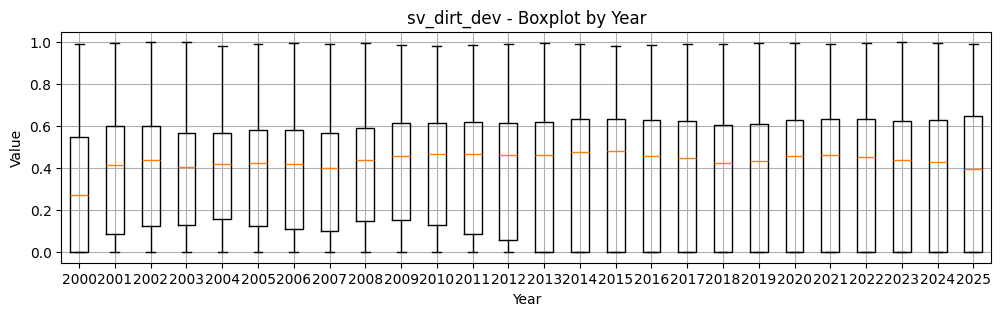

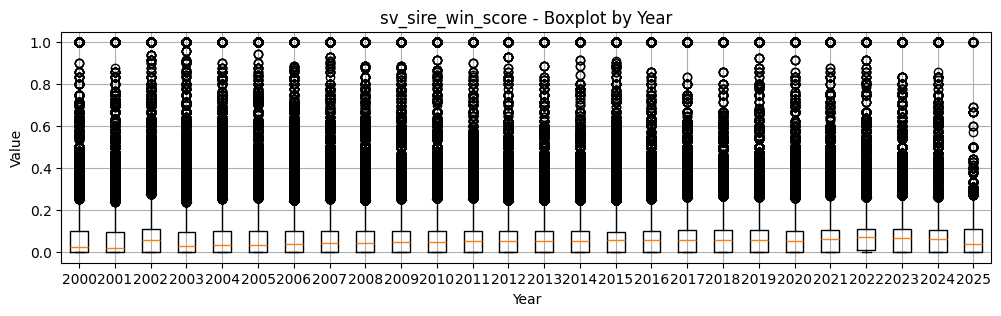

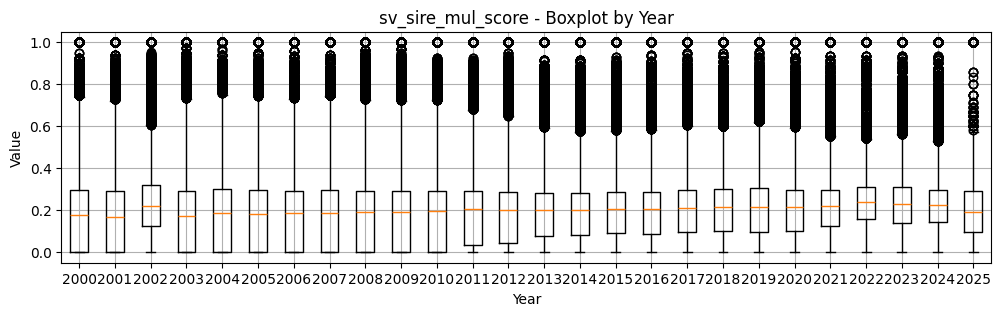

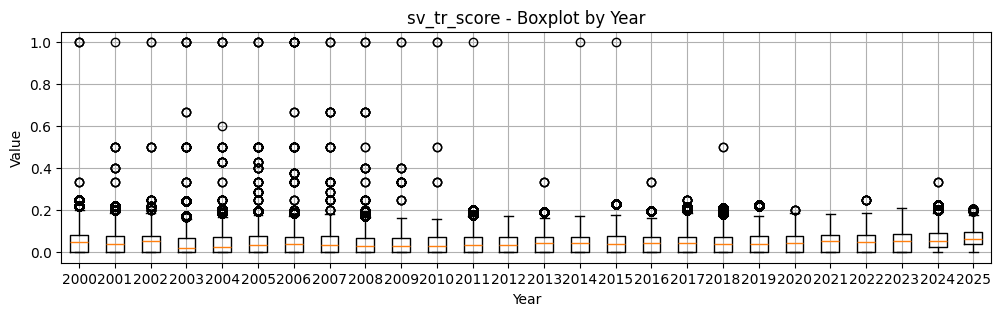

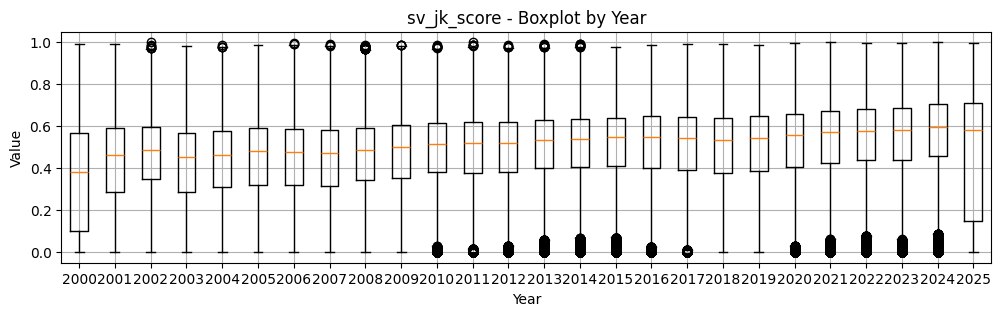

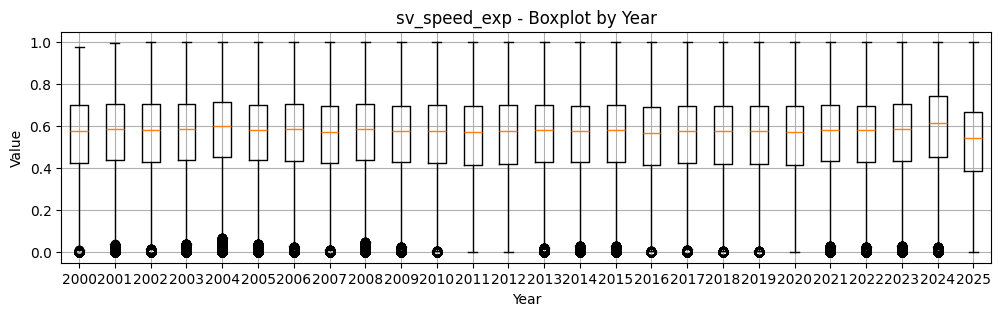

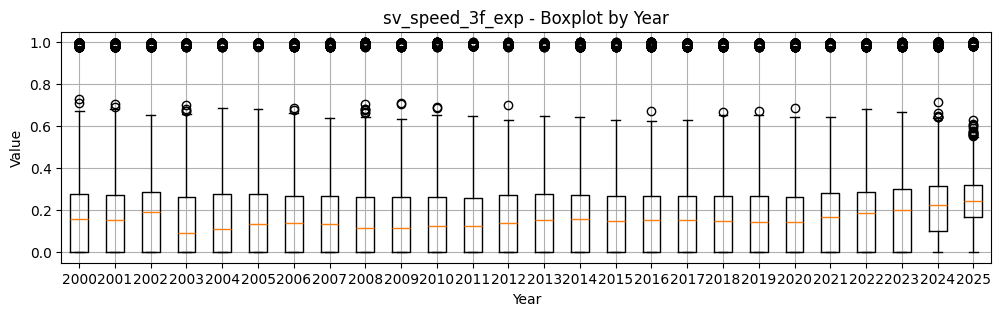

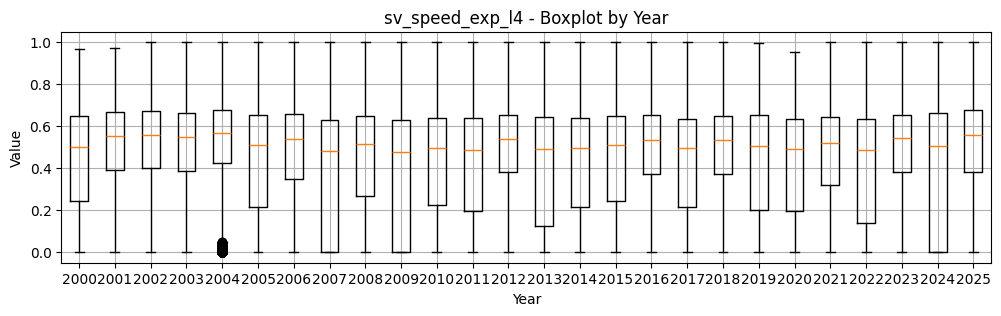

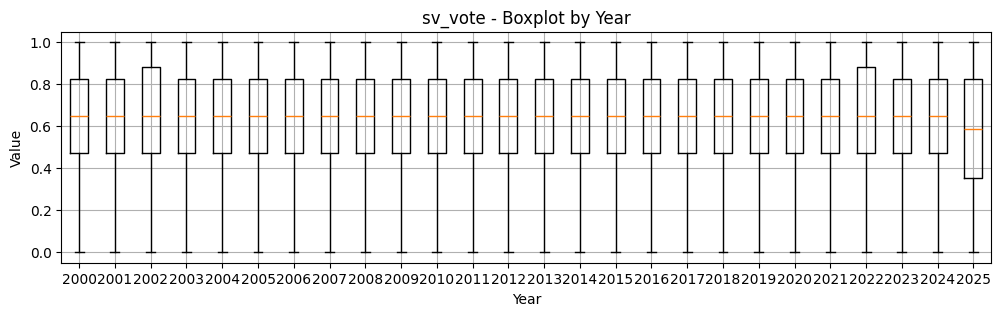

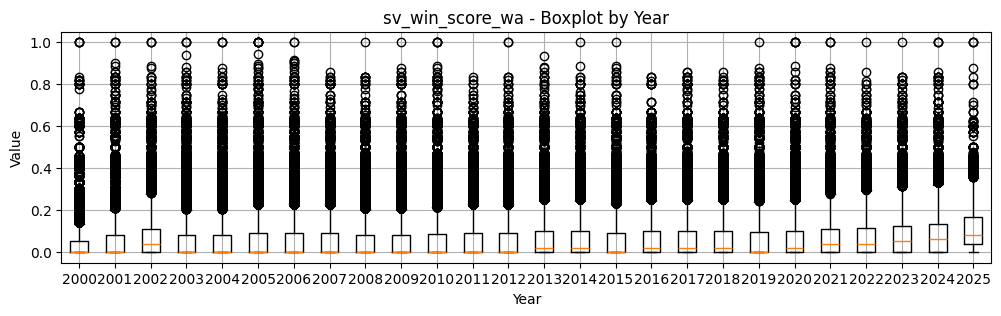

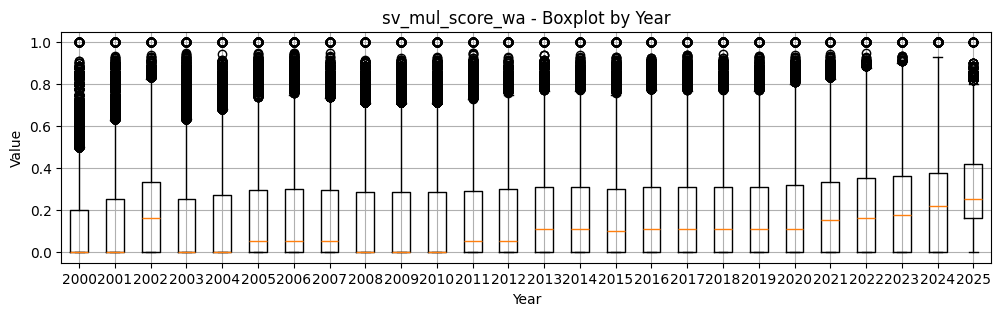

In [7]:
# 箱ひげ図の作成 (グラフの行数、列数、解像度を適宜変更)
#k_a_util.plot_boxplots(dict_statistics, rows=2, cols=4, dpi=72)

k_a_util.plot_boxplots_by_year(dict_statistics)